# Project Title:-Banking Dataset Marketing Targets


This project involves building a machine learning model to identify potential marketing targets for a
bank based on customer data. The goal is to predict whether a customer will respond positively to a
marketing campaign.

### Objective: Develop a machine learning model to predict customer response to a marketing campaign andd identify potential marketing targets.

Import necessary libraries:


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Data Collection

In [16]:
df = pd.read_csv("bank-full.csv",sep=';')

In [17]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Preprocessing

check for null values

In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We can see there are no null values so we can proceed further

### Exploratory Data Analysis (EDA)

lets check Correlation of this dataset

In [19]:
df.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Plotting the Heatmap of correlation matrix

<IPython.core.display.Javascript object>

<Axes: >

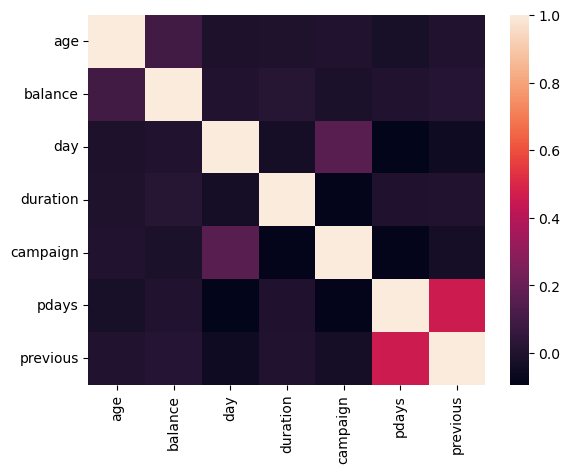

In [27]:
sns.heatmap(df.corr(numeric_only=True))

Let's plot joint graph of balance and age to understand the relationship between them

<IPython.core.display.Javascript object>

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


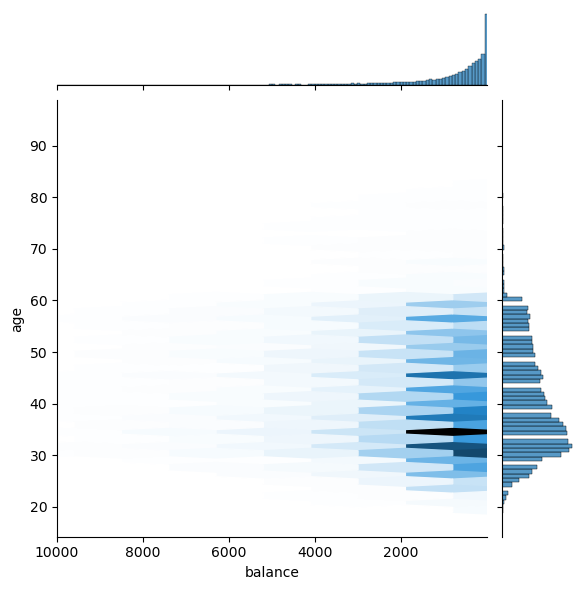

In [28]:
sns.jointplot(x='balance',y='age',data=df,kind='hex',xlim=10000)

From above graph we can see that the age majority lies between 20 to 65 and the balance is concentrated below 2000

Let's move further and plot joint graph of Pdays and previous columns

<IPython.core.display.Javascript object>

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


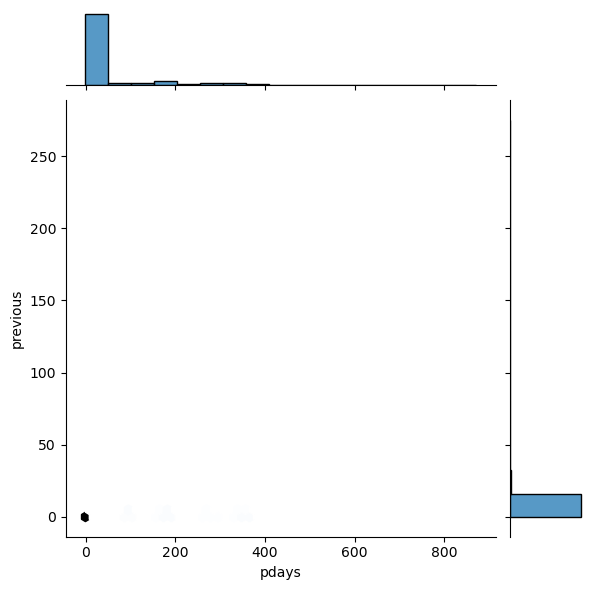

In [24]:
sns.jointplot(x='pdays',y='previous',data=df,kind='hex')

As we can see P days and previous days are concentrated at Arond 0 Hence you cannot consider this correlation

Now lets plot joint graph of Day and campaign

<IPython.core.display.Javascript object>

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


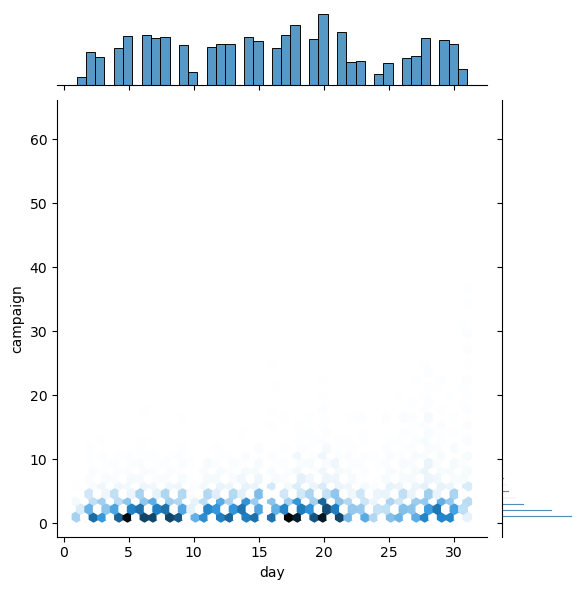

In [112]:
sns.jointplot(x='day',y='campaign',data=df,kind='hex')

Split data into features and target variable


In [29]:
X = df.drop("y", axis=1)
y = df["y"]

### Data Preprocessing

Encoding Categorical Variables:
To make categorical data usable by machine learning algorithms, which require numerical input, we encoded the categorical variables using LabelEncoder. The categorical columns in the dataset included "job", "marital", "education", "default", "housing", "loan", "contact", "month", and "poutcome". For each of these columns:

We initialized a LabelEncoder object.
The fit_transform method was applied to convert each category into a unique integer.
We stored the LabelEncoder objects in a dictionary (label_encoders) for each column, allowing us to reverse the encoding later if necessary.

In [94]:
#Encode categorical variables:
label_encoders = {}
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

Scaling Numerical Features:
To ensure that the numerical features had a standard scale, which is crucial for many machine learning algorithms, we applied StandardScaler. The numerical columns in the dataset included "age", "balance", "day", "duration", "campaign", "pdays", and "previous". The scaler standardizes the data by removing the mean and scaling it to unit variance:

We initialized a StandardScaler object.
The fit_transform method was applied to scale the numerical features, transforming them into a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [95]:
#Scale numerical features:
scaler = StandardScaler()
numerical_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

By encoding categorical variables and scaling numerical features, we ensured that the data was in a format suitable for training the machine learning model, enhancing the model's performance and interpretability.

Split data into training and testing sets:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering:

Given the imbalance in the dataset, with a large number of negative data points and fewer positive ones, we introduced a new feature called age_balance_ratio to improve model performance. This feature is calculated as the ratio of a customer's age to their account balance, potentially providing more informative insights for the model.

age_balance_ratio: This feature is derived by dividing the age of each individual by their balance. By creating this ratio, we aim to capture the relationship between a customer's age and their financial status, which might help the model differentiate more effectively between positive and negative outcomes.

In [97]:
# Let's create some new features that might be more informative
X_train['age_balance_ratio'] = X_train['age'] / X_train['balance']
X_test['age_balance_ratio'] = X_test['age'] / X_test['balance']

Handling Imbalanced Data:

To address the challenge of having a large number of negative data points compared to positive ones, we employed Tomek Links undersampling. This technique helps to balance the dataset by removing specific data points that are likely to be noise or redundant.

Tomek Links Undersampling: We used the TomekLinks method from the imblearn library to reduce the majority class (negative data points) in our dataset. Tomek Links identify pairs of closely related points from opposite classes where the removal of one instance (from the majority class) helps in making the decision boundary between the classes clearer. This step was crucial for improving the model's ability to learn from the more critical positive data points.

In [98]:
#Undersampling with Tomek Links
from imblearn.under_sampling import TomekLinks

# Apply Tomek Links undersampling
tl = TomekLinks(sampling_strategy='majority')
X_undersampled, y_undersampled = tl.fit_resample(X_train, y_train)

### Model Selection

In [99]:
#Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

Random Forest Classifier:

We initialized a Random Forest Classifier with a fixed random_state to ensure reproducibility. This ensemble learning method combines multiple decision trees to improve accuracy and prevent overfitting.

In [100]:
#train the model on the undersampled data
rf_model.fit(X_undersampled, y_undersampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7952
         yes       0.64      0.47      0.54      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043



Overall Accuracy: 90% accuracy is generally good, indicating that the model is correctly predicting most instances.

Model Evaluation:

The classification report provides a detailed evaluation of the model's performance on the test data:

Precision: The model achieved a precision of 0.93 for the "no" class and 0.64 for the "yes" class. This indicates that when the model predicts "no," it is correct 93% of the time, while predictions of "yes" are correct 64% of the time.

Recall: The recall for the "no" class is 0.96, meaning the model correctly identifies 96% of the actual "no" instances. For the "yes" class, the recall is 0.47, showing the model correctly identifies 47% of the actual "yes" instances.

F1-Score: The F1-score, which balances precision and recall, is 0.95 for the "no" class and 0.54 for the "yes" class. This indicates a strong performance for the "no" class and moderate performance for the "yes" class.

Accuracy: The overall accuracy of the model is 90%, indicating that the model correctly classifies 90% of the instances.

Macro Avg & Weighted Avg: The macro average and weighted average F1-scores are 0.74 and 0.90, respectively. The macro average treats all classes equally, while the weighted average accounts for class imbalance.

This evaluation highlights that while the model performs well overall, it struggles more with the minority "yes" class, which is typical in imbalanced datasets.

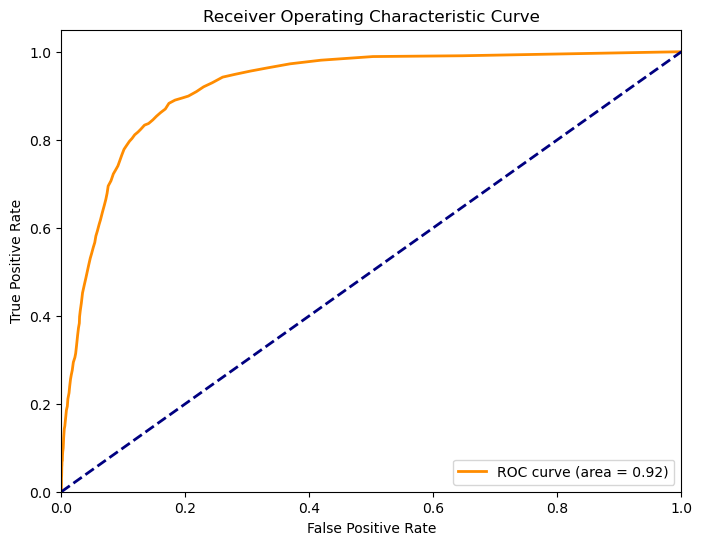

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Encode y_test labels (assuming "yes" is the positive class)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve (Receiver Operating Characteristic Curve) is a graphical representation of a classification model's performance at different classification thresholds.

 The area under the curve (AUC) provides a single metric to assess the model's overall ability to distinguish between positive and negative classes. 

An AUC of 0.92 indicates that your model is performing well.

 Here's what it means:   

92% Probability: The model has a 92% probability of correctly distinguishing between positive and negative cases.   
Good Discrimination: A higher AUC means the model is better at separating the two classes.   
Trade-off: The ROC curve shows how the model's sensitivity (true positive rate) and specificity (true negative rate) change as the classification threshold varies. 

n AUC of 0.92 suggests that your model is reasonably good at predicting customer response to the marketing campaign. 

In [102]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
11           duration    0.284935
16  age_balance_ratio    0.087571
5             balance    0.087536
0                 age    0.086388
10              month    0.082723
9                 day    0.076014
15           poutcome    0.052438
13              pdays    0.048813
1                 job    0.041074
12           campaign    0.031859
6             housing    0.027746
3           education    0.023560
8             contact    0.020111
14           previous    0.019405
2             marital    0.019078
7                loan    0.008976
4             default    0.001773


The provided feature importance scores reveal the relative importance of different attributes in predicting customer response to the marketing campaign. Here's a breakdown of the most influential factors:

Top 5 Features:

duration: The length of the marketing call is the most significant predictor, suggesting that longer conversations might increase the likelihood of a positive response.
age_balance_ratio: The ratio of the customer's age to their balance is also influential. This might indicate that older customers with higher balances are more likely to respond.
balance: The customer's financial balance is another important factor, suggesting that customers with higher balances might be more likely to respond.
age: The customer's age also plays a role, though to a lesser extent than the previous features.
month: The month in which the campaign was conducted might also influence response rates.
Less Influential Features:

poutcome, pdays, contact, job, marital, education, housing, loan, and default have relatively low importance, suggesting that they might not be as strong predictors of customer response.

User Input Preprocessing and Prediction:

In this section, we implemented functions to preprocess user input and generate predictions using the trained Random Forest model:

Preprocess User Input:
The preprocess_input function converts user input into a DataFrame and applies necessary transformations:

Categorical features are label-encoded using pre-fitted encoders.
Numerical features are scaled using the pre-fitted scaler.
The interaction term age_balance_ratio is calculated by dividing age by balance.
Predict Using User Input:
The predict_user_input function preprocesses the input and then predicts the probability of a lead converting into a customer. The prediction is expressed as a percentage, providing an intuitive interpretation for the user.

This process enables the model to make predictions based on new user data, ensuring that all preprocessing steps align with the trained model's expectations.

In [127]:
# Function to preprocess user input
def preprocess_input(user_input):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Apply label encoding for categorical features
    for col in categorical_cols:
        le = label_encoders[col]
        input_df[col] = le.transform(input_df[col])
    
    # Apply scaling
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    
    # Create interaction term
    input_df['age_balance_ratio'] = input_df['age'] / input_df['balance']
    
    return input_df


# Function to predict using user input
def predict_user_input(user_input):
    try:
        preprocessed_input = preprocess_input(user_input)
        prediction_probs = rf_model.predict_proba(preprocessed_input)
        prediction = prediction_probs[0][1] * 100  # Convert to percentage
        return f'The probability of lead converting into a customer is {prediction:.2f}%'
    except Exception as e:
        return f'Error in prediction: {str(e)}'


# Example usage
user_input = {
    'age': 41,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1333,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'unknown',
    'day': 6,
    'month': 'may',
    'duration': 1400,
    'campaign': 1,
    'pdays': 1,
    'previous': 0,
    'poutcome': 'unknown'
}

# Make prediction
prediction_result = predict_user_input(user_input)
print(prediction_result)

The probability of lead converting into a customer is 76.00%


Prediction Result:

The model predicts that the probability of the lead converting into a customer is 76.00%. This result is based on the user-provided data, which has been preprocessed and analyzed by the Random Forest model. The prediction gives a clear indication of the likelihood of the lead becoming a customer.